In [1]:
import pandas as pd
import os
import librosa
import torchaudio
import matplotlib.pyplot as plt

/home/gustavo/anaconda3/envs/rnp/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


testes

In [2]:
def plot_spectrogram(spec, title=None, ylabel="freq_bin", aspect="auto", xmax=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(spec), origin="lower", aspect=aspect)
    if xmax:
        axs.set_xlim((0, xmax))
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

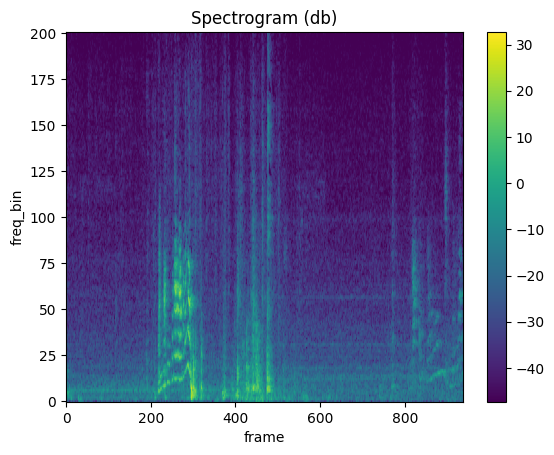

In [31]:
waveform, sample_rate = torchaudio.load('dataset/audios/cat_3.wav', normalize=True)
transform = torchaudio.transforms.Spectrogram(n_fft=400)
spectrogram = transform(waveform)
plot_spectrogram(spectrogram[0])

In [ ]:


def create_spectograms(output_dir,df):
    
    if not os.path.isdir(output_dir):
        os.makedirs(output_dir)
    for i in range(0,len(df)):
        waveform, sample_rate = torchaudio.load(df.loc[i,'file_path'], normalize=True)
        transform = torchaudio.transforms.Spectrogram(n_fft=800)
        spectrogram = transform(waveform)
        plot_spectrogram(spectrogram)
        break
        

In [ ]:
df_train = pd.read_csv("dataset/train.csv")
df_test = pd.read_csv("dataset/test.csv")